In [26]:
import sqlite3
import pandas
database_name = "/home/becode/Downloads/Documents/churn_prediction/data/database.db"
conn = sqlite3.connect(database_name)
df = pandas.read_sql('SELECT * FROM bank_churners', conn)
#df = df[['Customer_Age', 'Gender', 'Dependent_count', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category', 'Months_on_book']]
conn.close()

In [27]:
#df = df[['Attrition_Flag','Total_Relationship_Count', 'Credit_Limit', 'Total_Revolving_Bal', 'Avg_Open_To_Buy', 'Total_Trans_Amt', 'Total_Trans_Ct']]


In [28]:
df['avg_trans_amount'] = df['Total_Trans_Amt']/df['Total_Trans_Ct']
df = df[['Attrition_Flag' ,'Total_Trans_Ct','Total_Trans_Amt']]


In [29]:
from sklearn.preprocessing import LabelEncoder
from matplotlib import pyplot as plt
categorical_features = df.select_dtypes(include=['object'])
lb = LabelEncoder()
for var in categorical_features:
    df[var] = lb.fit_transform(df[var])

In [30]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2, svd_solver='full')
 
#Transform the data
df = pca.fit_transform(df)

In [31]:
pca.feature_names_in_

array(['Attrition_Flag', 'Total_Trans_Ct', 'Total_Trans_Amt'],
      dtype=object)

In [32]:
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.cluster import KMeans

plt.figure(figsize=(16, 6))
colors = ["#A181E0", "#E08181", "#599988", "#A181E0", "#E08181", "#599988"]

#ax = sns.scatterplot(data=df, x=df['Months_Inactive_12_mon'], y="Attrition_Flag", hue='km_clusters', s=200, palette=colors, legend=True)
#ax = sns.scatterplot(data=df, x="Cluster Centroid D1", y="Cluster Centroid D2", hue='km_clusters', s=1000, palette=colors, legend=False, alpha=0.1)
kmeans = KMeans(n_clusters=3, n_init=10).fit(df)
label = kmeans.fit_predict(df)

centers = np.array(kmeans.cluster_centers_)
centroid = pandas.DataFrame(centers)
#sns.scatterplot(x =df.iloc[:,10], y =df.iloc[:,11], s = 50, c = X['cluster'], marker = "o", hue = X['cluster'])
#sns.scatterplot(x = centers[:,0], y = centers[:,1], marker="o", color='r', s = 70, label="centroid")

#sns.scatterplot(data = kmeans.cluster_centers_, x= kmeans.cluster_centers_[:,10], y = kmeans.cluster_centers_[:,11], hue = kmeans.cluster_centers_[:,6], marker='+', color='black', s=200)
#sns.scatterplot(data=df, x=df.iloc[:,10], y=df.iloc[:,11], hue = df.iloc[:,6] ,s=200, legend=True)

#plt.legend(loc='lower right', title='Cluster')
#ax.set_title("Clustered Points", fontsize='xx-large', y=1.05);

#df['cluster_centers'] = kmeans.cluster_centers_
#df['cluster_labels'] = kmeans.labels_


<Figure size 1600x600 with 0 Axes>

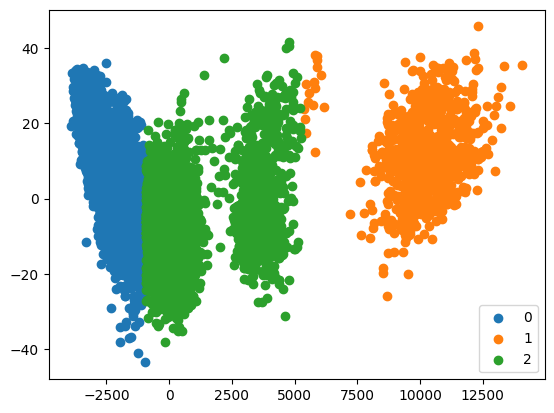

In [33]:
#filtered_label0 = df[label == 2]
 
 
u_labels = np.unique(label)
 
#plotting the results:
 
for i in u_labels:
    plt.scatter(df[label == i , 0] , df[label == i , 1] , label = i)
plt.legend()
plt.show()

In [34]:
centroid

,0,1
0,-2357.608384,7.693713
1,10198.676206,12.274746
2,492.282956,-8.536263


In [35]:
df

array([[-3.26016309e+03,  4.67319188e+00],
       [-3.11321557e+03,  1.44923982e+01],
       [-2.51729734e+03,  3.08154842e+01],
       ...,
       [ 5.88679502e+03,  3.76997483e+01],
       [ 3.99083566e+03,  2.51255093e+01],
       [ 5.88980055e+03,  3.67165513e+01]])

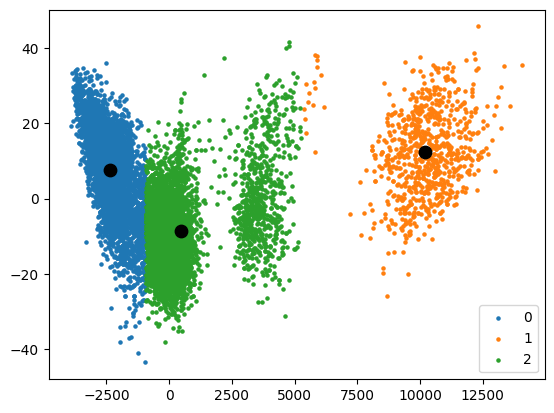

In [38]:
#Getting the Centroids
centroids = kmeans.cluster_centers_
u_labels = np.unique(label)
 
#plotting the results:
 
for i in u_labels:
    plt.scatter(df[label == i , 0] , df[label == i , 1] , s = 5, label = i)
plt.scatter(centroids[:,0] , centroids[:,1] , s = 80, color = 'k')
plt.legend()
plt.show()